Objectif du projet : il s'agit de développer une solution d'aide à la décision basée sur le Machine Learning  permettant à un conseiller financier de décider si un client a le droit ou non à l'ouverture d'un compte bancaire. Une telle solution doit prendre en compte l'aspect confidentiel des données client.

# Imports

## Import des librairies

In [765]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

## Import des données

In [766]:
data = pd.read_csv("data/data.csv")

In [767]:
data

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


# Exploratory

# dtypes

In [768]:
data.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

## Basics Informations

In [769]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [770]:
data.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## Missing values

In [771]:
data.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

<AxesSubplot:>

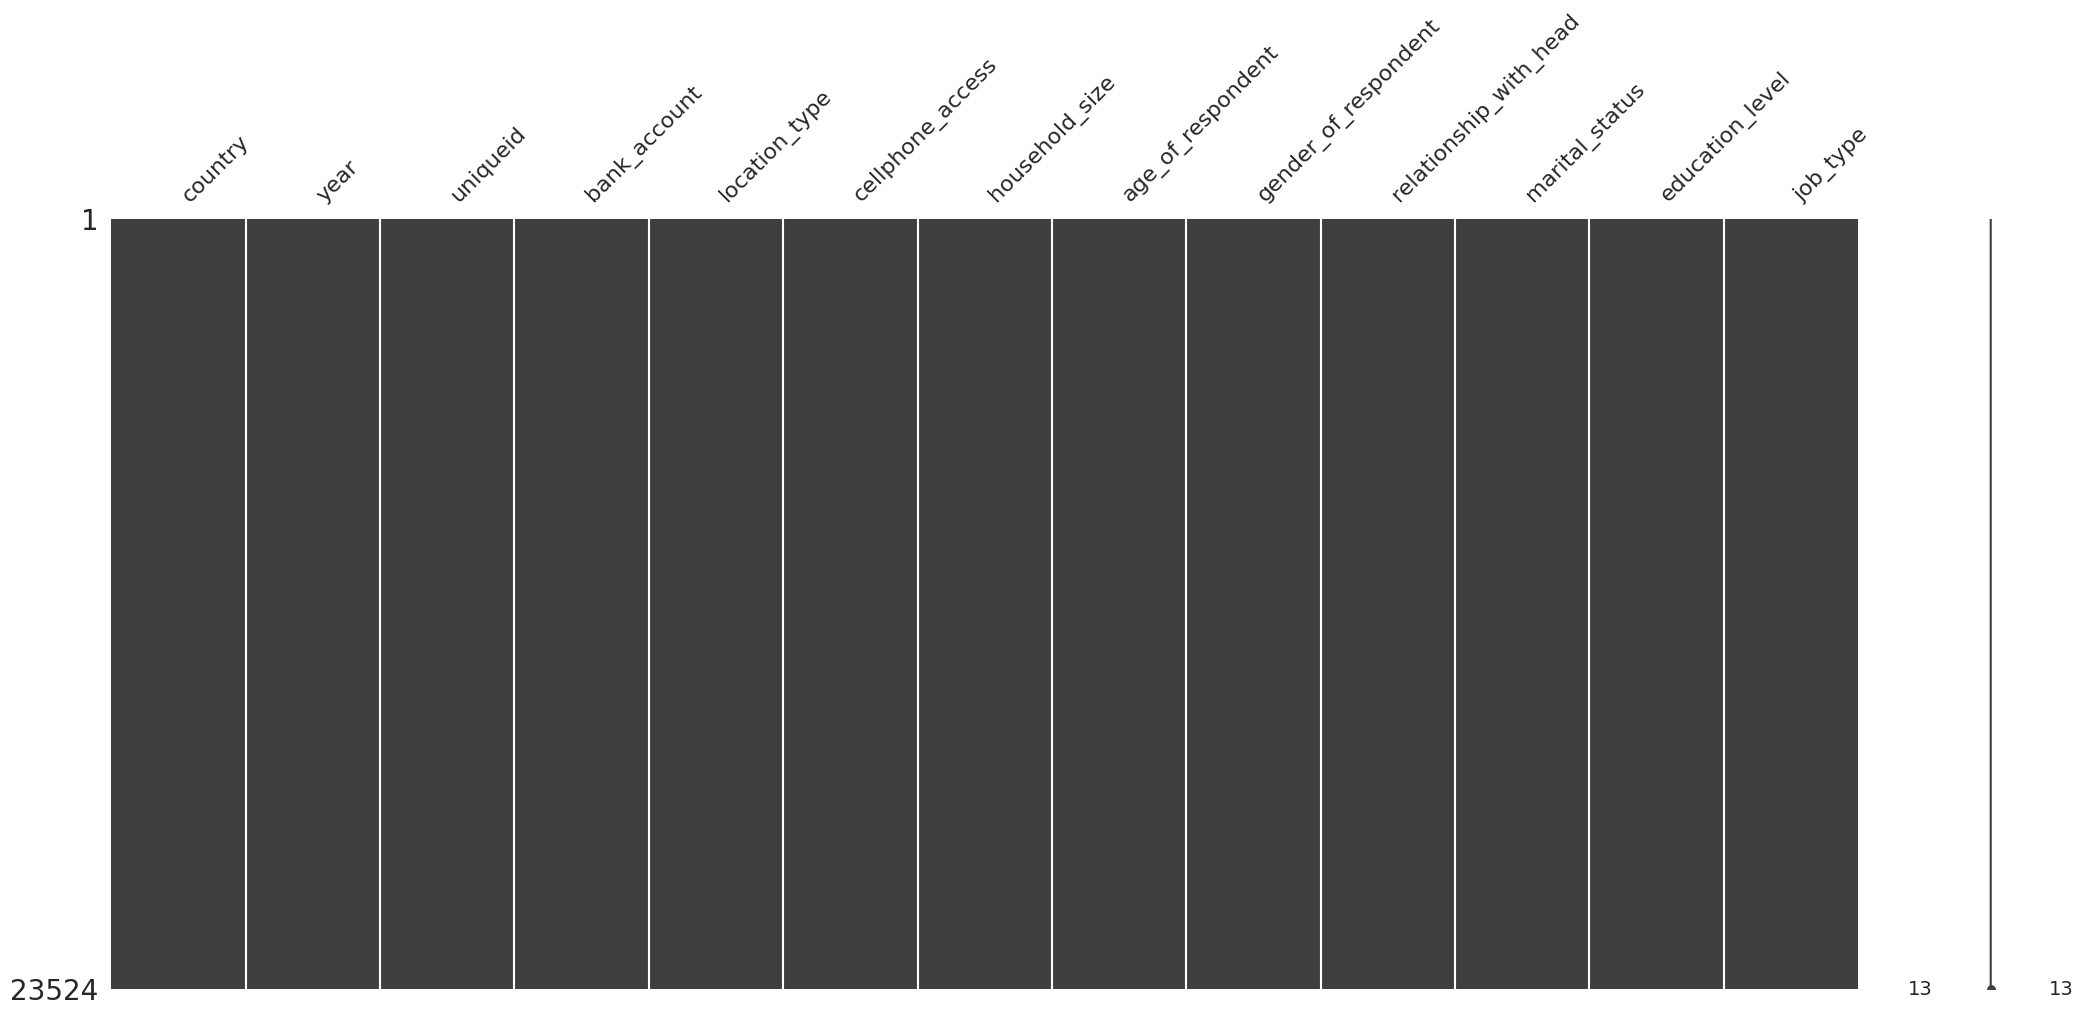

In [772]:
import missingno as mno
mno.matrix(data)

## duplicates

In [773]:
data.duplicated().sum()

0

## Categorical values

In [774]:
data["country"].unique()

array(['Kenya', 'Rwanda', 'Tanzania', 'Uganda'], dtype=object)

In [775]:
data["location_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [776]:
data["cellphone_access"].unique()

array(['Yes', 'No'], dtype=object)

In [777]:
data["gender_of_respondent"].unique()

array(['Female', 'Male'], dtype=object)

In [778]:
data["relationship_with_head"].unique()

array(['Spouse', 'Head of Household', 'Other relative', 'Child', 'Parent',
       'Other non-relatives'], dtype=object)

In [779]:
data["marital_status"].unique()

array(['Married/Living together', 'Widowed', 'Single/Never Married',
       'Divorced/Seperated', 'Dont know'], dtype=object)

In [780]:
data["education_level"].unique()

array(['Secondary education', 'No formal education',
       'Vocational/Specialised training', 'Primary education',
       'Tertiary education', 'Other/Dont know/RTA'], dtype=object)

In [781]:
data["job_type"].unique()

array(['Self employed', 'Government Dependent',
       'Formally employed Private', 'Informally employed',
       'Formally employed Government', 'Farming and Fishing',
       'Remittance Dependent', 'Other Income',
       'Dont Know/Refuse to answer', 'No Income'], dtype=object)

# Encoding

## Opérations sur mes colonnes

Je vais changer les valeurs de certaines de mes colonnes : 
- country : categorical discrete (1, 2, 3)
- year : datetime (2018 en Year)
- bank_account : binaire (0, 1)
- location_type : binaire (0, 1)
- cellphone_access : binaire(0, 1)
- gender_of_respondent : binaire(0, 1) 
- relationship_with_head : OnehotEncoder
- marital_status : OneHotEncoder
- education_level : OneHotEncoder
- job_type : OneHotEncoder

### OneHotEncoder

In [782]:
from sklearn.preprocessing import OneHotEncoder

# create and fit one hot encoder
encoder = OneHotEncoder(dtype = int)
features_1hot = encoder.fit_transform(data[["relationship_with_head", "marital_status", "education_level", "job_type", "country"]])

# encode data and convert to dataframe
features_1hot_df = pd.DataFrame(features_1hot.toarray())

# set column names
features_1hot_df.columns = encoder.get_feature_names(["relationship_with_head", "marital_status", "education_level", "job_type", "country"])

# drop the original columns
df_enc = pd.concat([data.drop(["relationship_with_head", "marital_status", "education_level", "job_type", "country"], axis = 1), 
                    features_1hot_df], axis = 1)

In [783]:
df_enc

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,No,Rural,No,5,70,Female,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,No,Rural,Yes,5,34,Female,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,No,Urban,No,8,26,Male,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,0,0,...,0,0,0,0,0,1,0,0,0,1


### Colonnes binaires

In [784]:
df_enc["bank_account"] = df_enc["bank_account"].map({"Yes": 1, "No": 0})
df_enc["location_type"] = df_enc["location_type"].map({"Rural": 0, "Urban": 1})
df_enc["cellphone_access"] = df_enc["cellphone_access"].map({"Yes": 1, "No": 0})
df_enc["gender_of_respondent"] = df_enc["gender_of_respondent"].map({"Female": 0, "Male": 1})

In [785]:
df_enc

,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
0,2018,uniqueid_1,1,0,1,3,24,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,2018,uniqueid_2,0,0,0,5,70,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,2018,uniqueid_3,1,1,1,5,26,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2018,uniqueid_4,0,0,1,5,34,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,2018,uniqueid_5,0,1,0,8,26,1,1,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,0,1,4,48,0,0,1,...,0,0,0,1,0,0,0,0,0,1
23520,2018,uniqueid_2114,0,0,1,2,27,0,0,1,...,0,0,0,1,0,0,0,0,0,1
23521,2018,uniqueid_2115,0,0,1,5,27,0,0,0,...,0,0,0,1,0,0,0,0,0,1
23522,2018,uniqueid_2116,0,1,1,7,30,0,0,0,...,0,0,0,0,0,1,0,0,0,1


### Target Encoder

In [787]:
data.columns

Index(['country', 'year', 'uniqueid', 'bank_account', 'location_type',
       'cellphone_access', 'household_size', 'age_of_respondent',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'education_level', 'job_type'],
      dtype='object')

In [742]:
from category_encoders import TargetEncoder

encoder = TargetEncoder()
df_enc['cellphone_enc'] = encoder.fit_transform(df_enc['cellphone_access'], df_enc['bank_account'])
df_enc = df_enc.drop(["cellphone_access"], axis = 1)

In [743]:
df_enc["cellphone_enc"].value_counts()

0.183797    17454
0.017133     6070
Name: cellphone_enc, dtype: int64

In [744]:
df_enc

,year,uniqueid,bank_account,location_type,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,cellphone_enc
0,2018,uniqueid_1,1,0,3,24,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0.183797
1,2018,uniqueid_2,0,0,5,70,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.017133
2,2018,uniqueid_3,1,1,5,26,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0.183797
3,2018,uniqueid_4,0,0,5,34,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.183797
4,2018,uniqueid_5,0,1,8,26,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0.017133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,0,4,48,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0.183797
23520,2018,uniqueid_2114,0,0,2,27,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0.183797
23521,2018,uniqueid_2115,0,0,5,27,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.183797
23522,2018,uniqueid_2116,0,1,7,30,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.183797


### Colonne datetime ( year )

On verra plus tard pour changer le type de cette colonne, pour l'instant je ne sais pas encore si elle va poser problème à mon modèle

## type de mes colonnes après FE

In [745]:
df_enc.dtypes

year                                                 int64
uniqueid                                            object
bank_account                                         int64
location_type                                        int64
household_size                                       int64
age_of_respondent                                    int64
gender_of_respondent                                 int64
relationship_with_head_Child                         int64
relationship_with_head_Head of Household             int64
relationship_with_head_Other non-relatives           int64
relationship_with_head_Other relative                int64
relationship_with_head_Parent                        int64
relationship_with_head_Spouse                        int64
marital_status_Divorced/Seperated                    int64
marital_status_Dont know                             int64
marital_status_Married/Living together               int64
marital_status_Single/Never Married                  int

# Outliers

Je vais observer mes outliers avec un boxplot pour décider quoi en faire

In [746]:
def plot_multiple_boxplots(df):
    numeric_cols = df.select_dtypes(include='number').columns
    for col in numeric_cols:
        sns.boxplot(x=df[col])
        plt.title(col)
        plt.show()

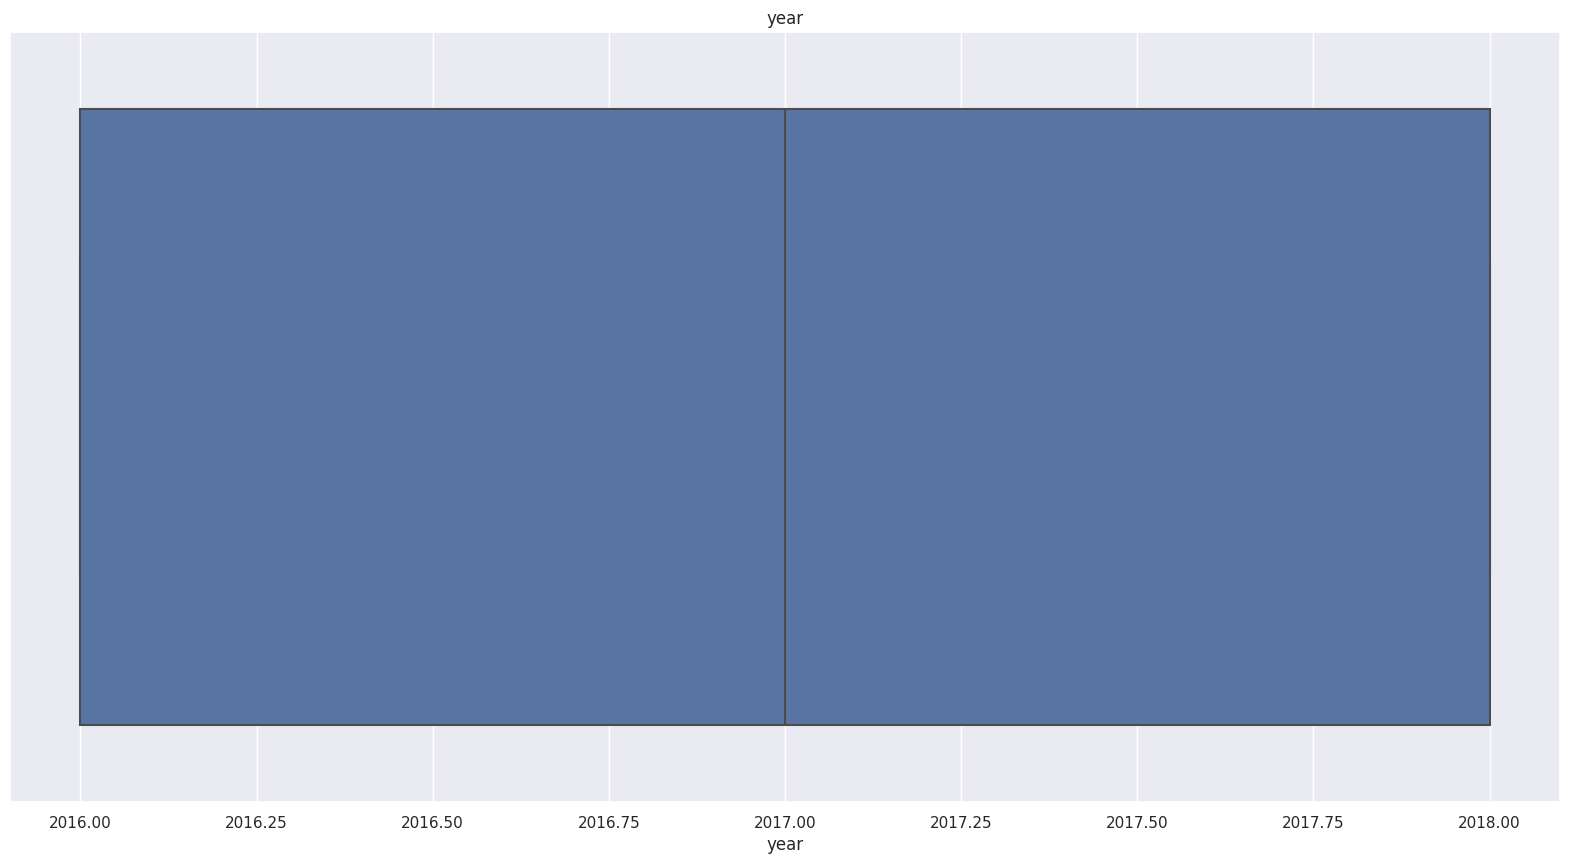

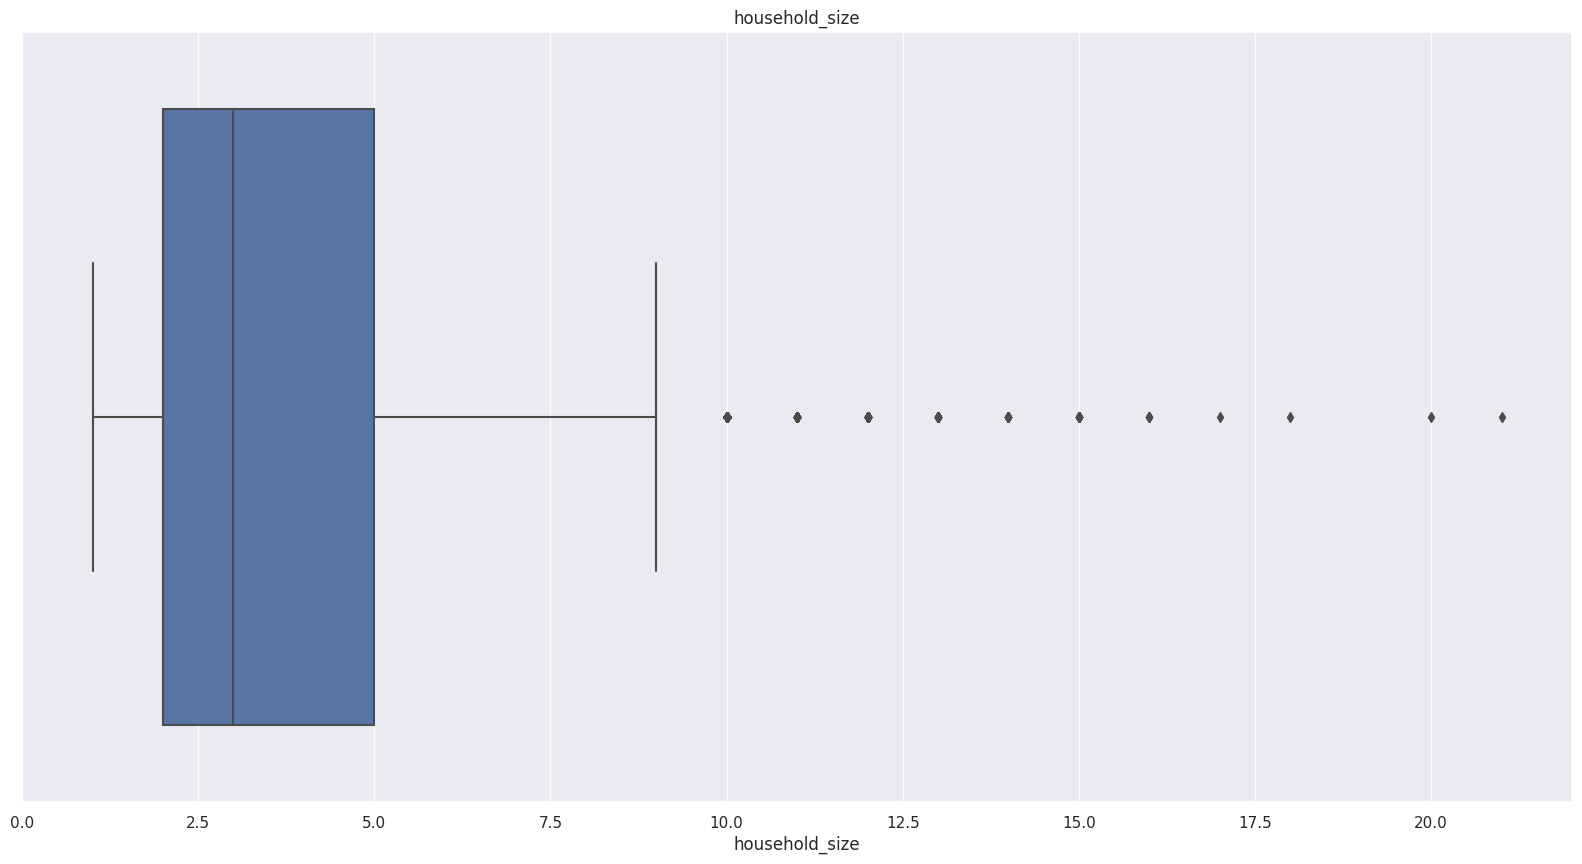

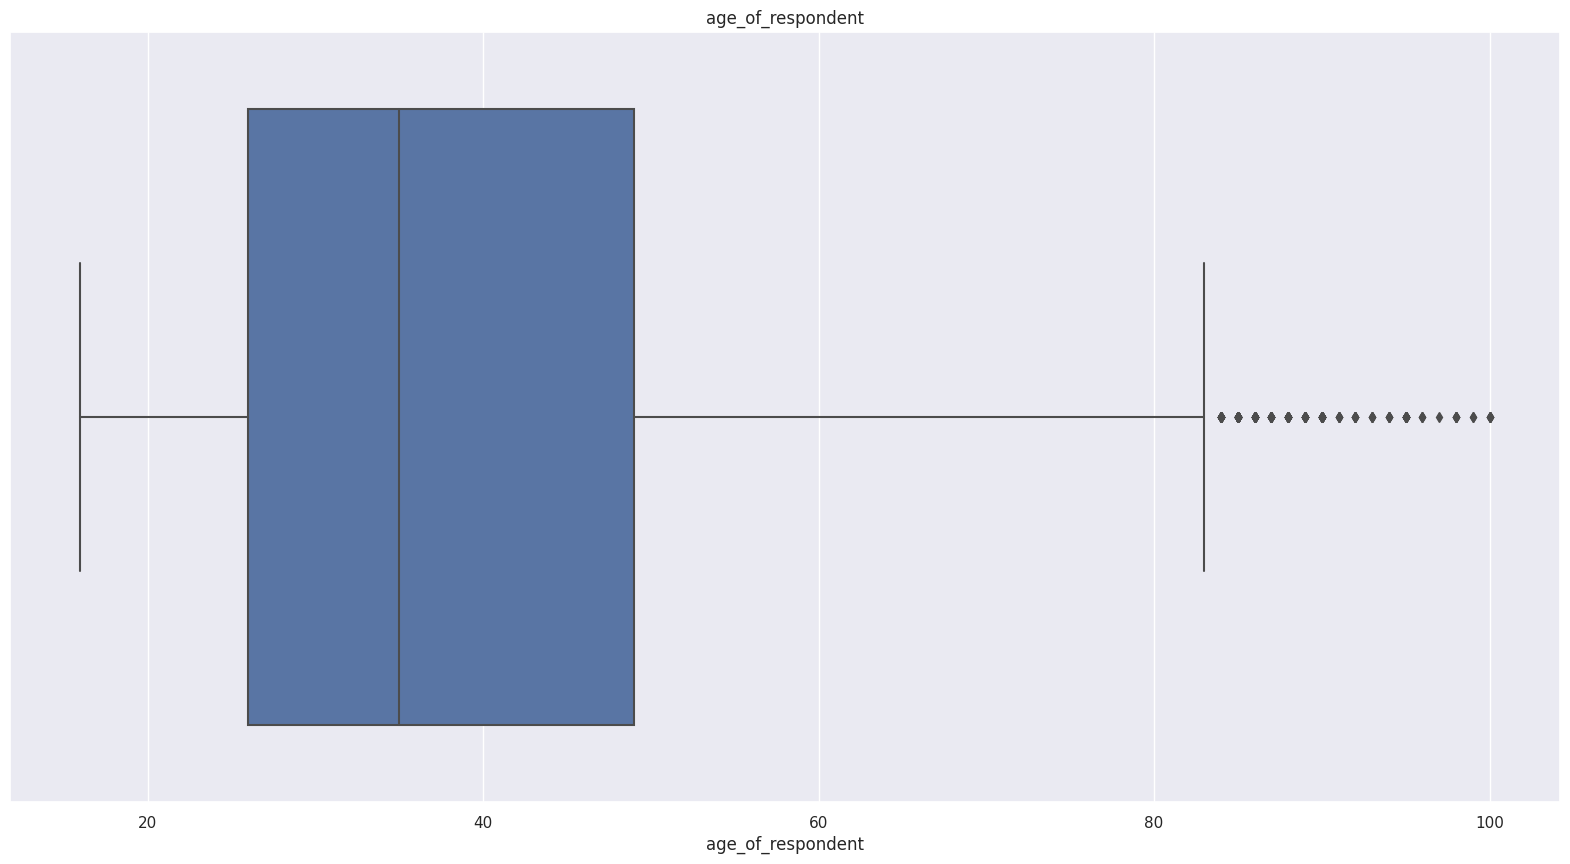

In [747]:
box_plot = plot_multiple_boxplots(data)

Je ne vais pas les toucher pour l'instant étant donné qu'ils ne sont pas nombreux et ne semble pas atipyque ou erroné

# Visualisation

In [748]:
ru_pivot = pd.pivot_table(data = data[data["bank_account"] == "Yes"], columns = "location_type", values = "bank_account",
                                aggfunc = 'count')
ru_np = ru_pivot.to_numpy()
ru_np_reshape = ru_np.reshape(2,)

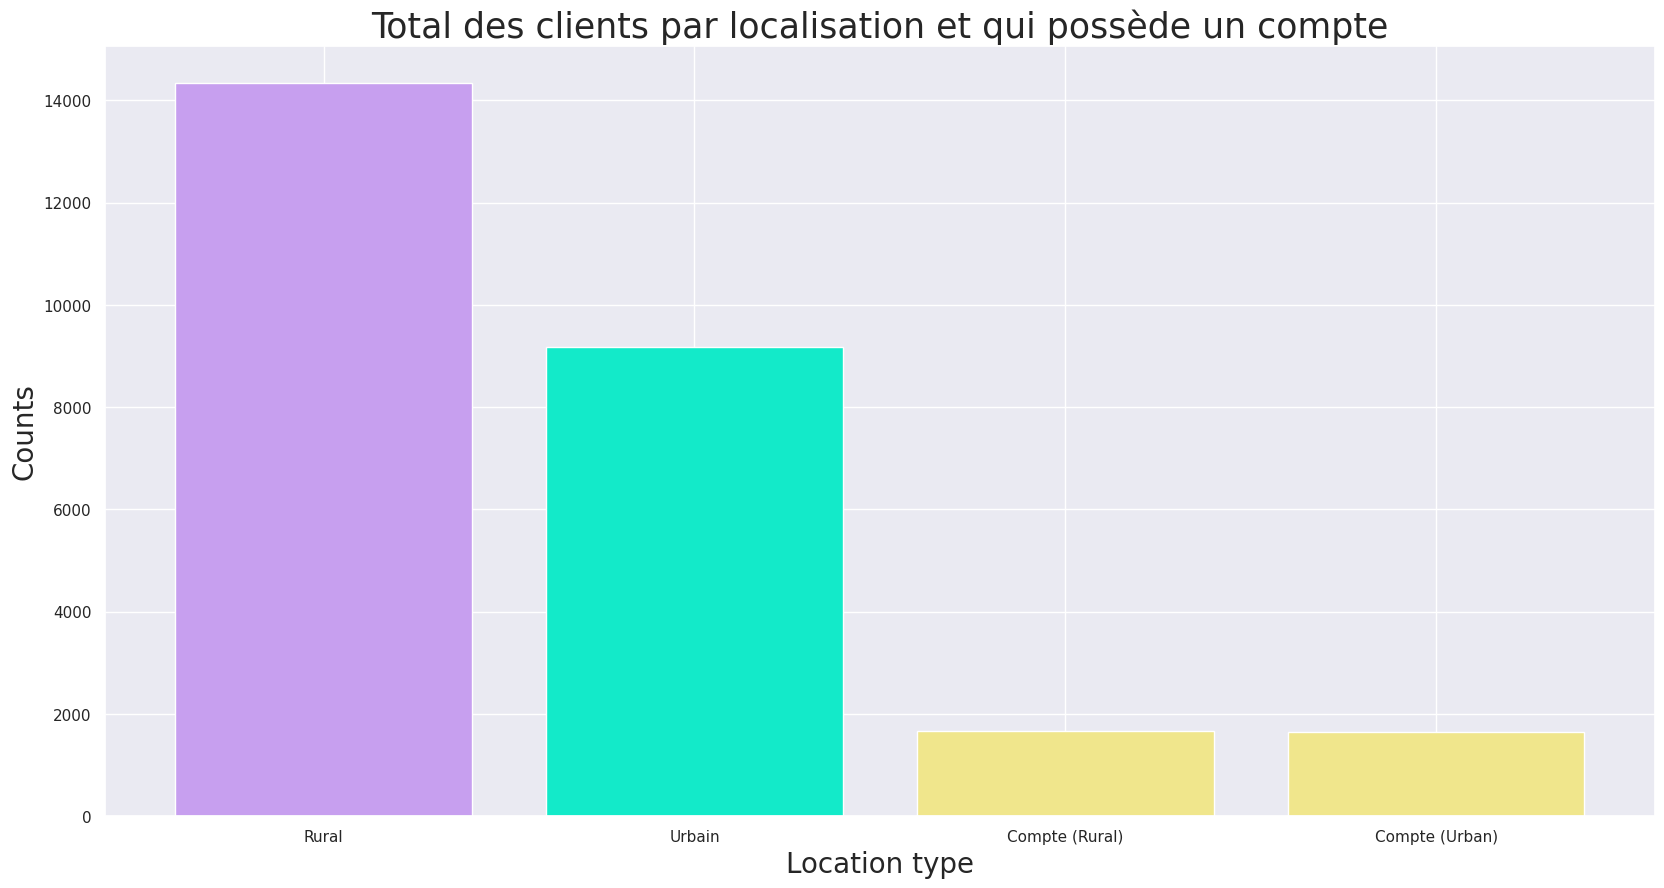

In [749]:
location_type = ["Rural", "Urbain"]
location_counts = data["location_type"].value_counts()
location_colors = ["#C79FEF", "#13EAC9"]
location_type_1 = ["Compte (Rural)", "Compte (Urban)"]
location_counts_1 = ru_np_reshape
location_colors_1 = ["#F0E68C", "#F0E68C"]

plt.bar(location_type, location_counts, color = location_colors)
plt.bar(location_type_1, location_counts_1, color = location_colors_1)

plt.title("Total des clients par localisation et qui possède un compte", fontsize = 25)
plt.xlabel("Location type", fontsize = 20)
plt.ylabel("Counts", fontsize = 20)
plt.show()

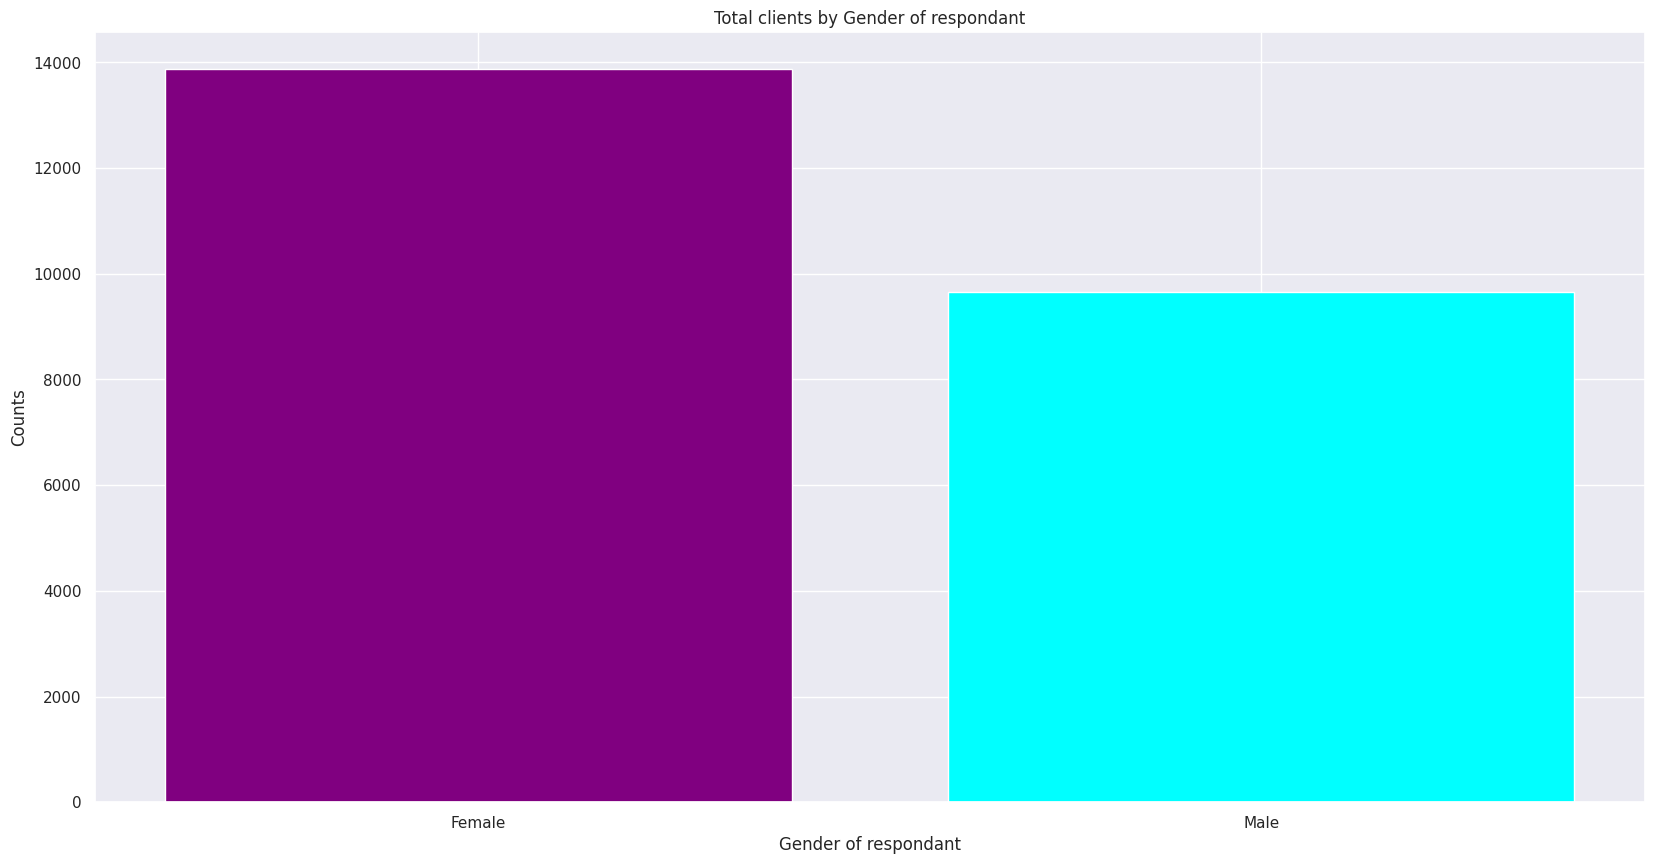

In [750]:
gender = ["Female", "Male"]
gender_counts = data["gender_of_respondent"].value_counts()
gender_colors = ["purple", "cyan"]

plt.bar(gender, gender_counts, color = gender_colors)

plt.title("Total clients by Gender of respondant")
plt.xlabel("Gender of respondant")
plt.ylabel("Counts")
plt.show()

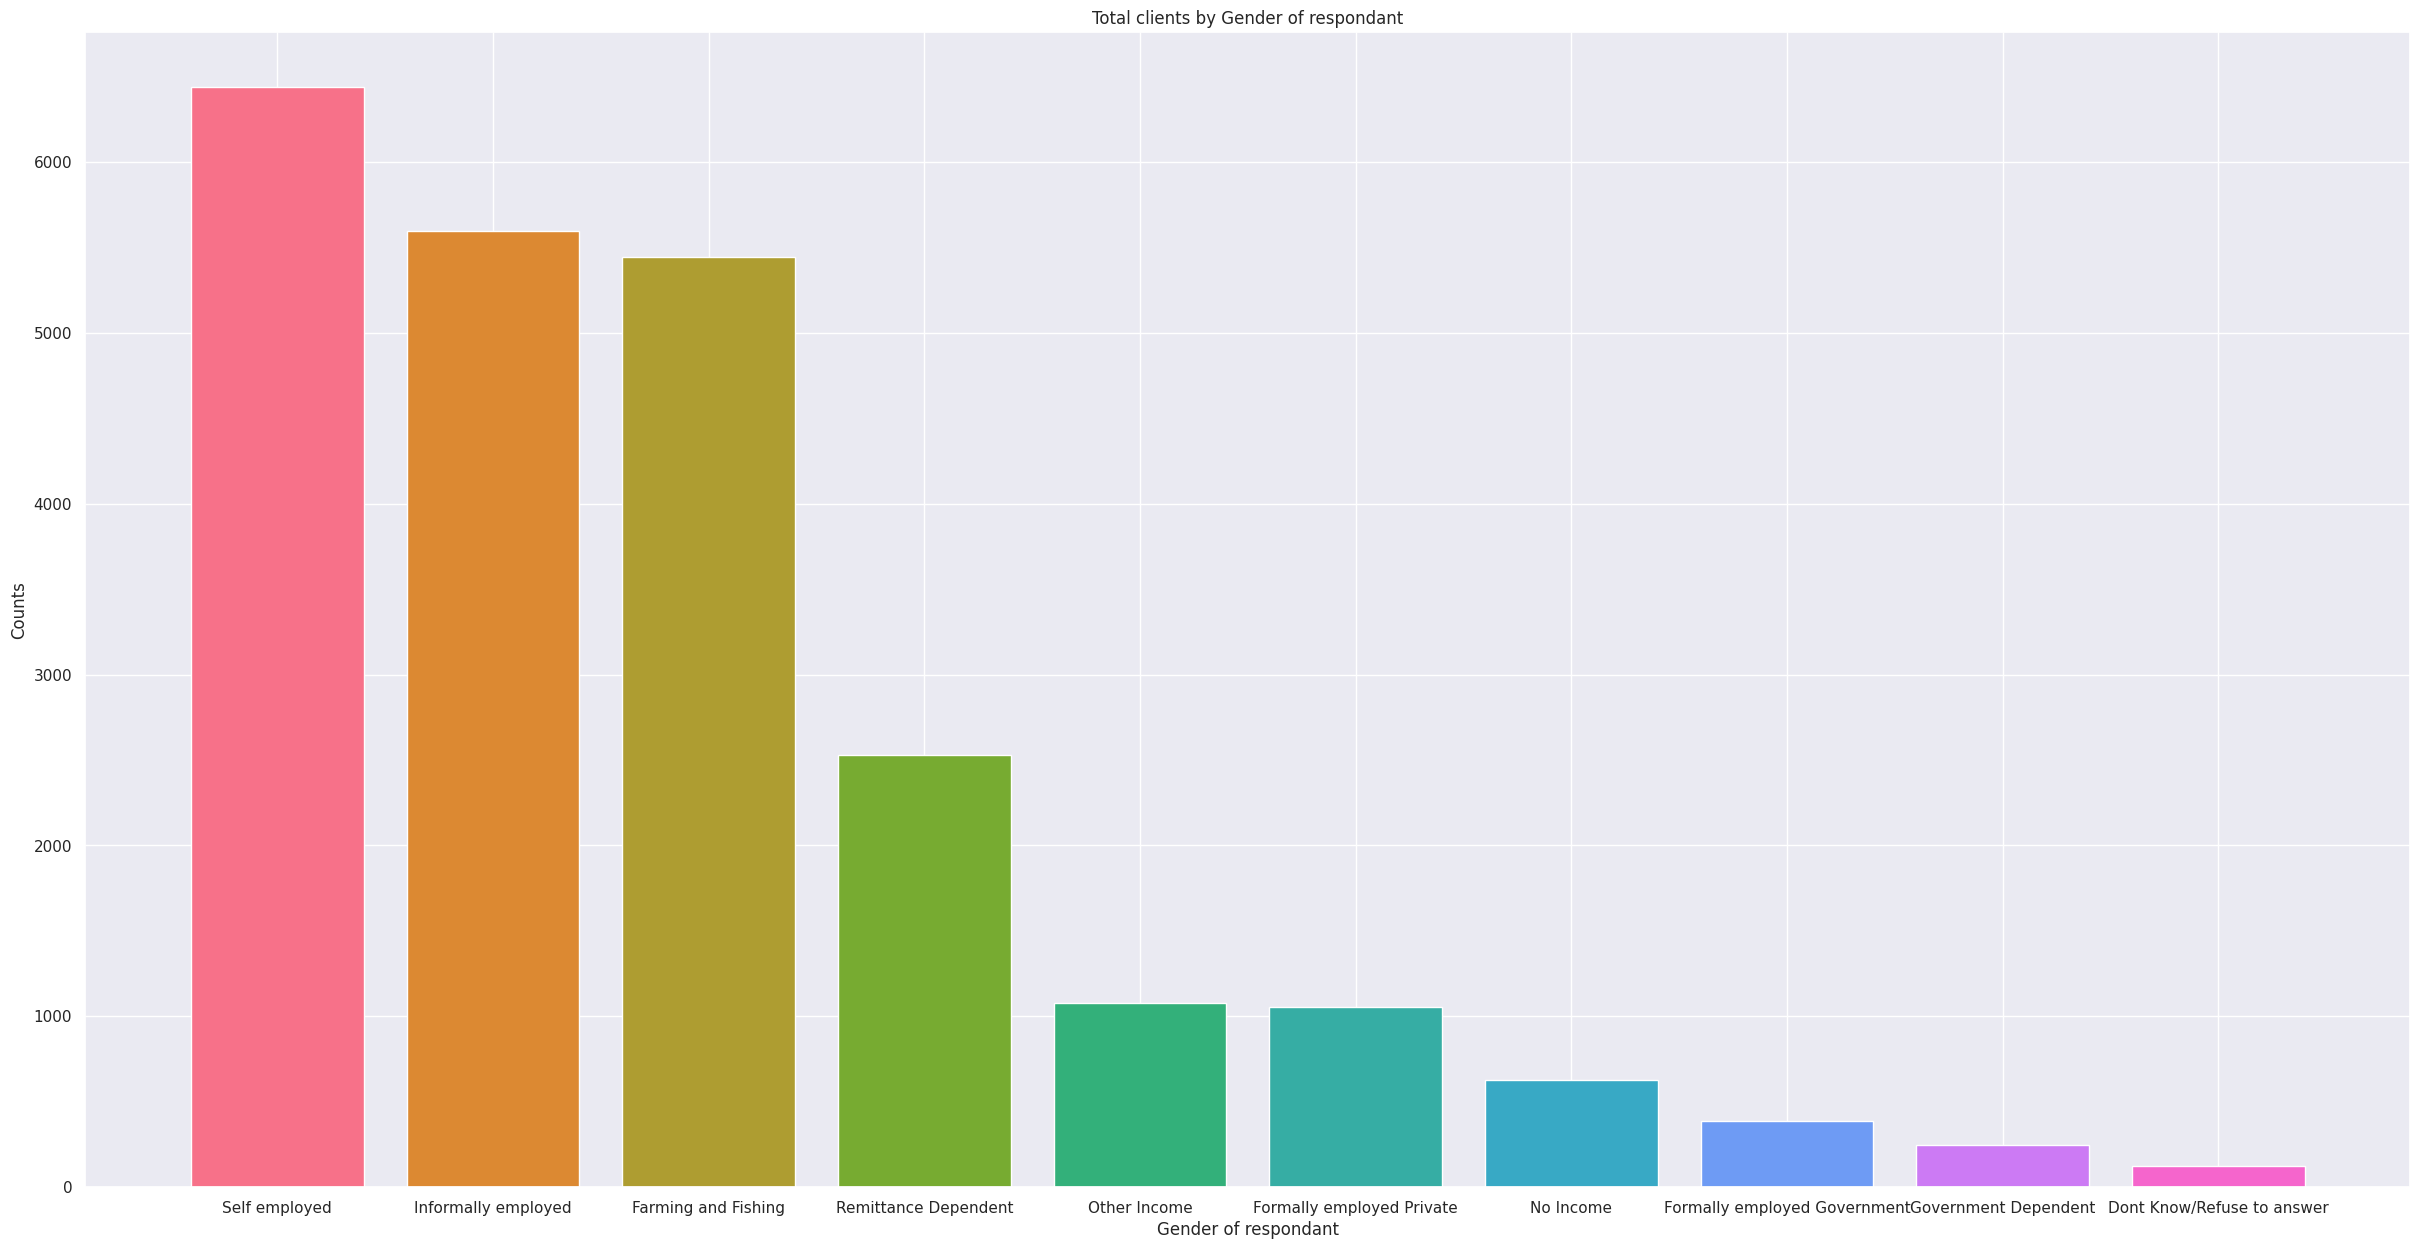

In [751]:
job_type = ["Self employed", "Informally employed", "Farming and Fishing", "Remittance Dependent", "Other Income", 
           "Formally employed Private", "No Income", "Formally employed Government", "Government Dependent", 
            "Dont Know/Refuse to answer"]
job_type_counts = data["job_type"].value_counts()
job_type_colors = sns.color_palette("husl", 10)

plt.figure(figsize = (30, 15))

plt.bar(job_type, job_type_counts, color = job_type_colors)

plt.title("Total clients by Gender of respondant")
plt.xlabel("Gender of respondant")
plt.ylabel("Counts")
plt.show()

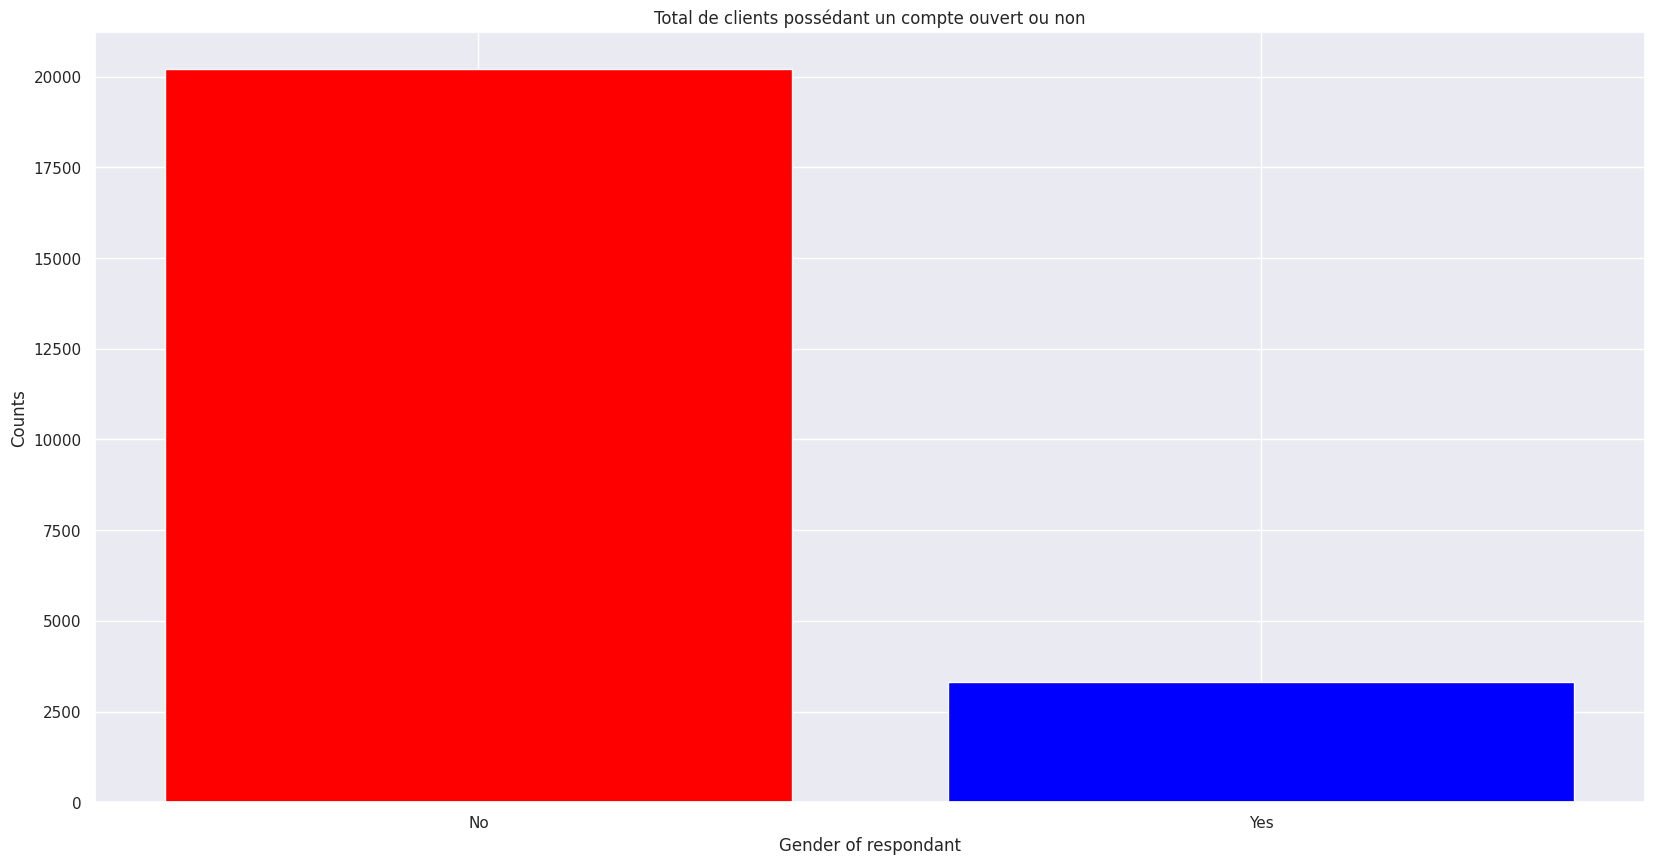

In [752]:
bank_account = ["No", "Yes"]
bank_account_counts = data["bank_account"].value_counts()
bank_account_colors = ["Red", "Blue"]

plt.bar(bank_account, bank_account_counts, color = bank_account_colors)

plt.title("Total de clients possédant un compte ouvert ou non")
plt.xlabel("Gender of respondant")
plt.ylabel("Counts")
plt.show()

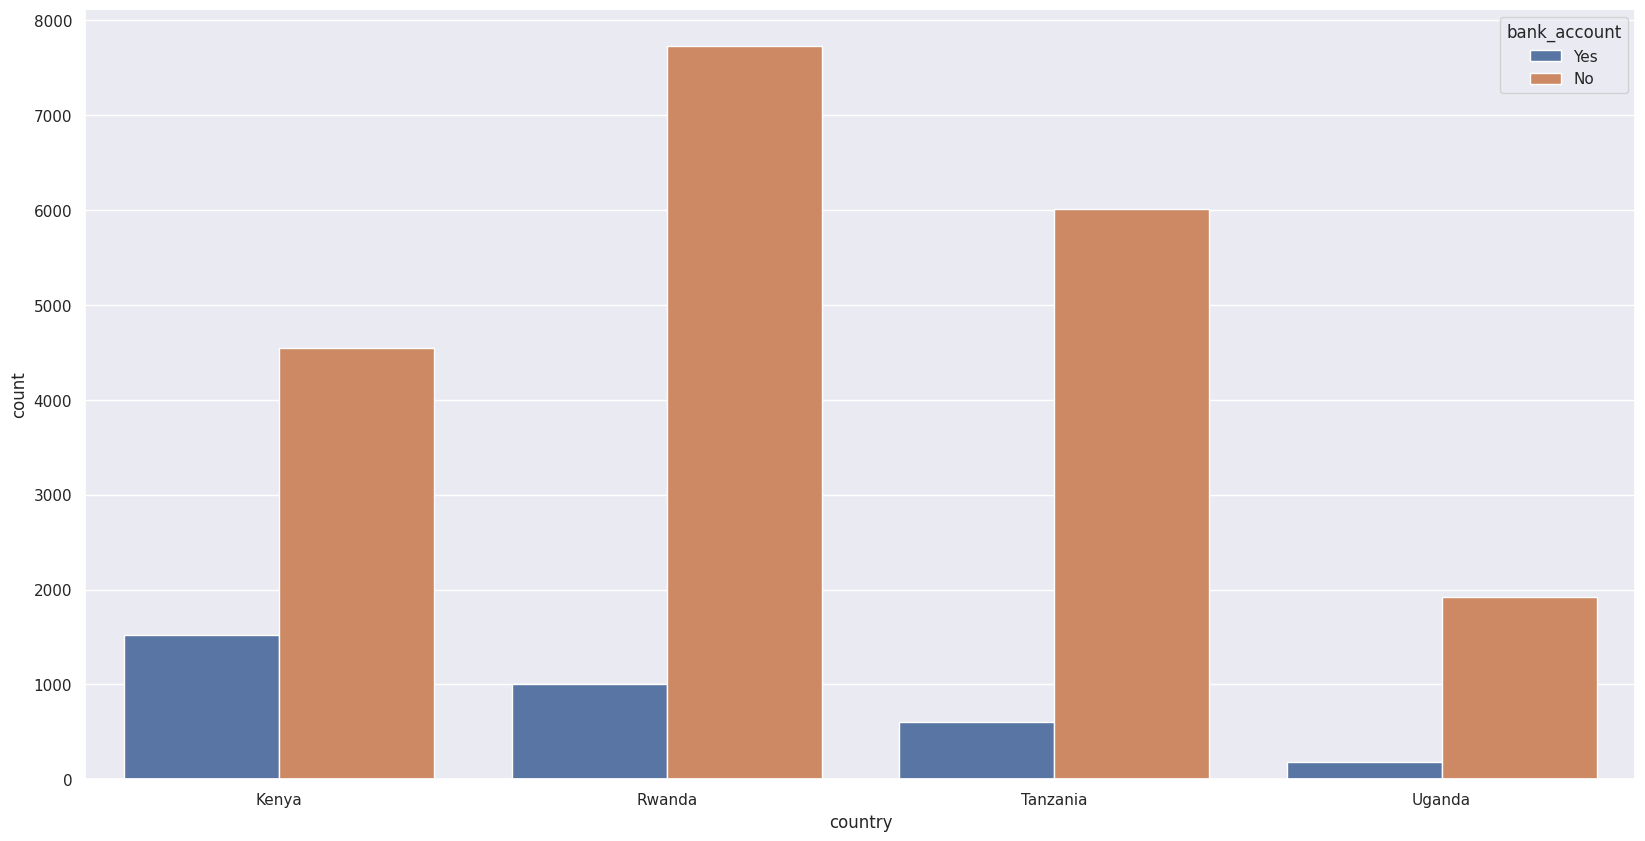

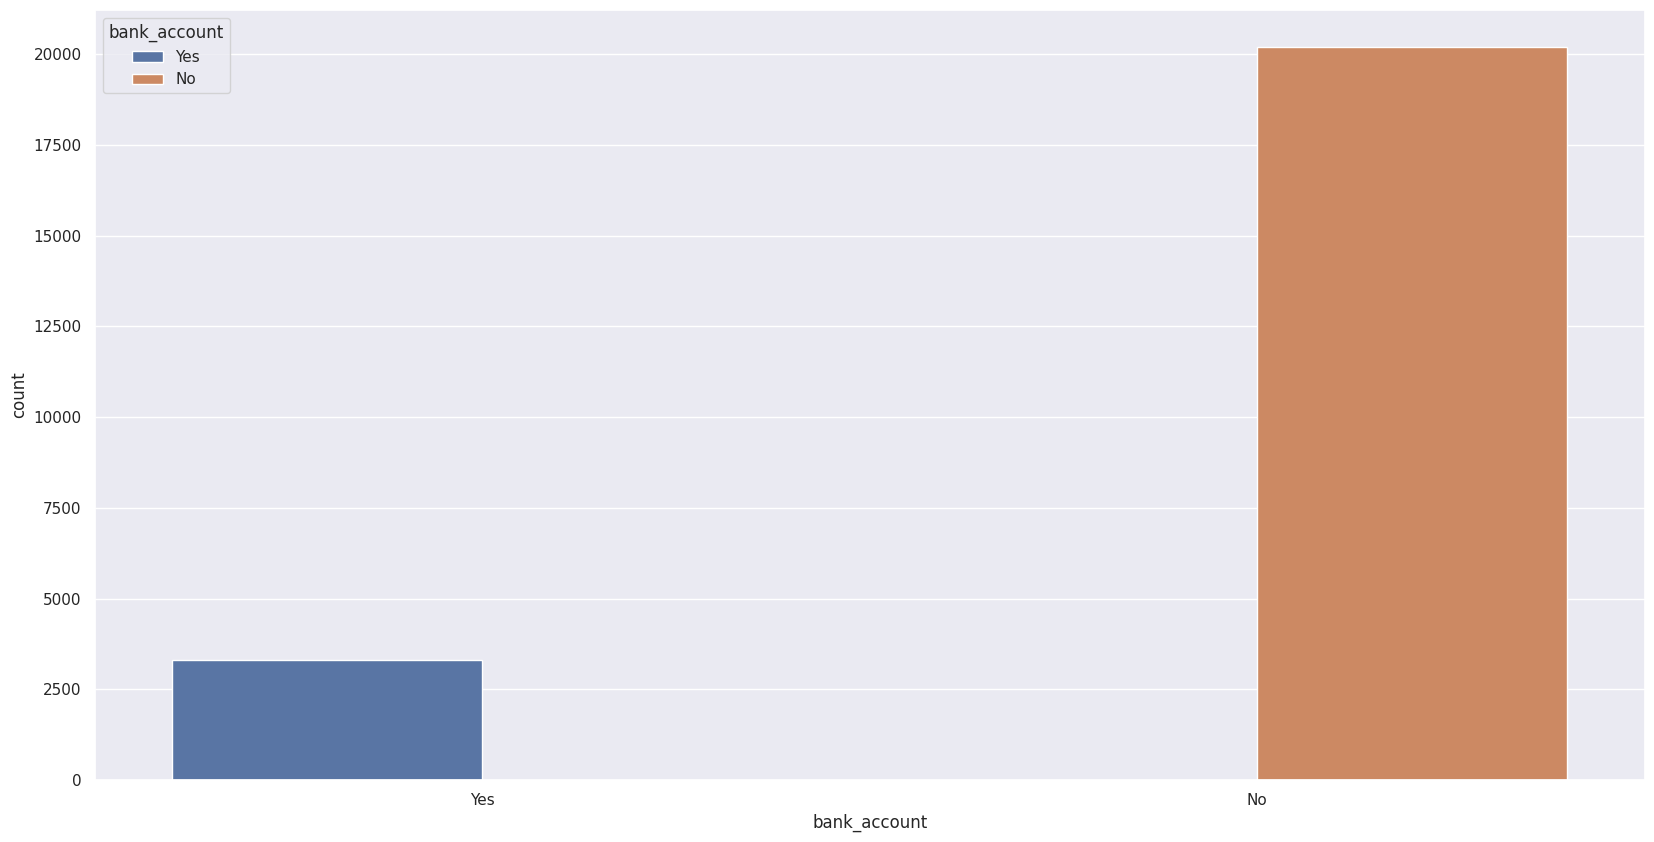

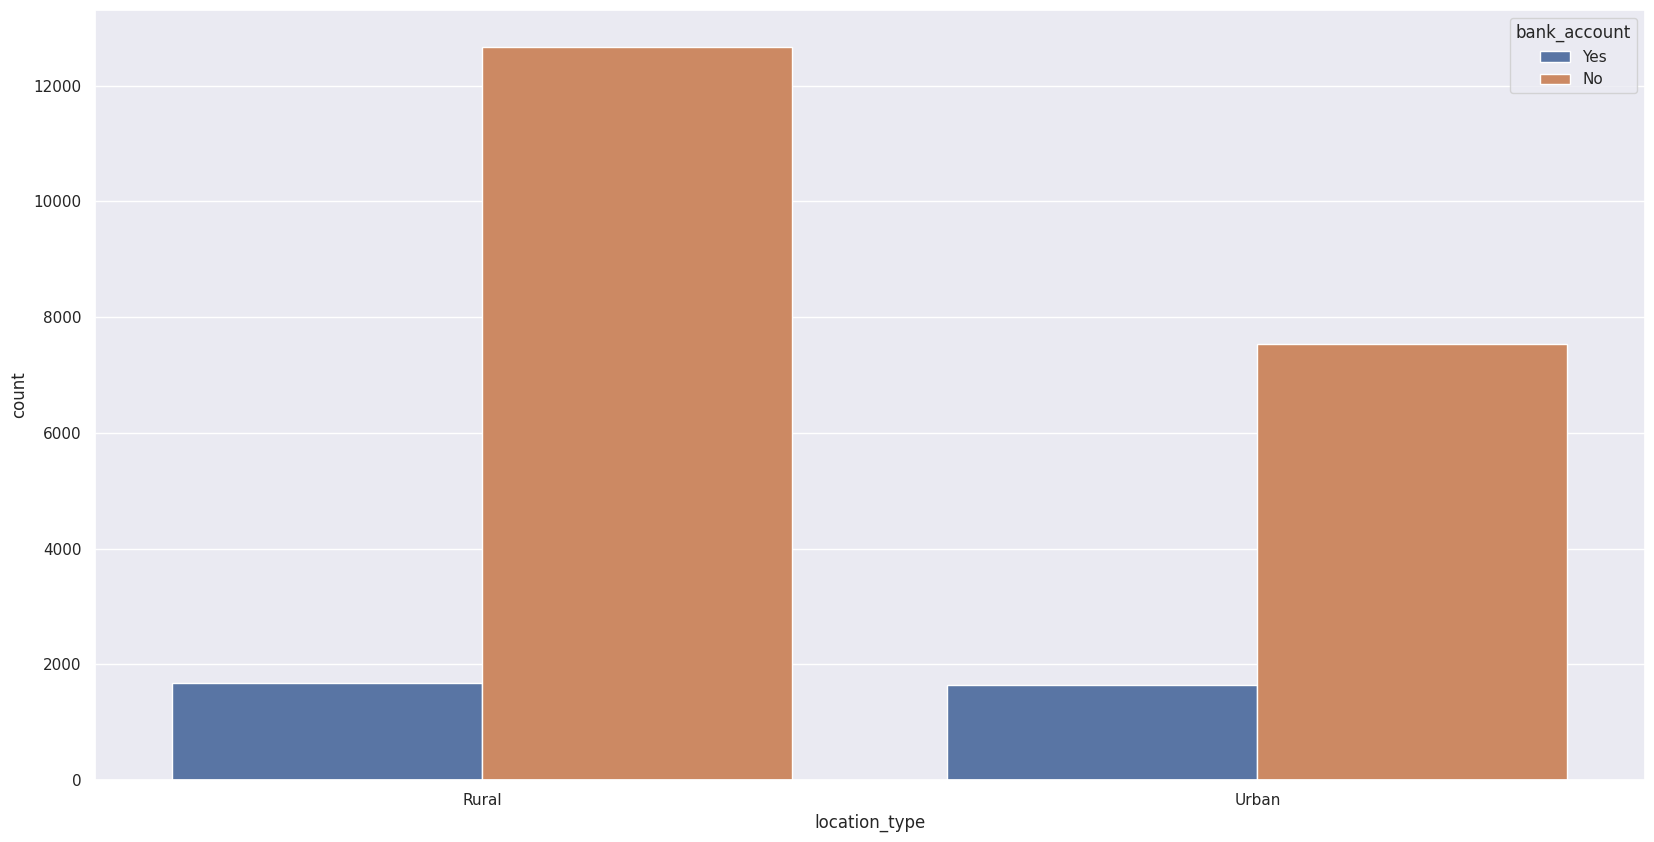

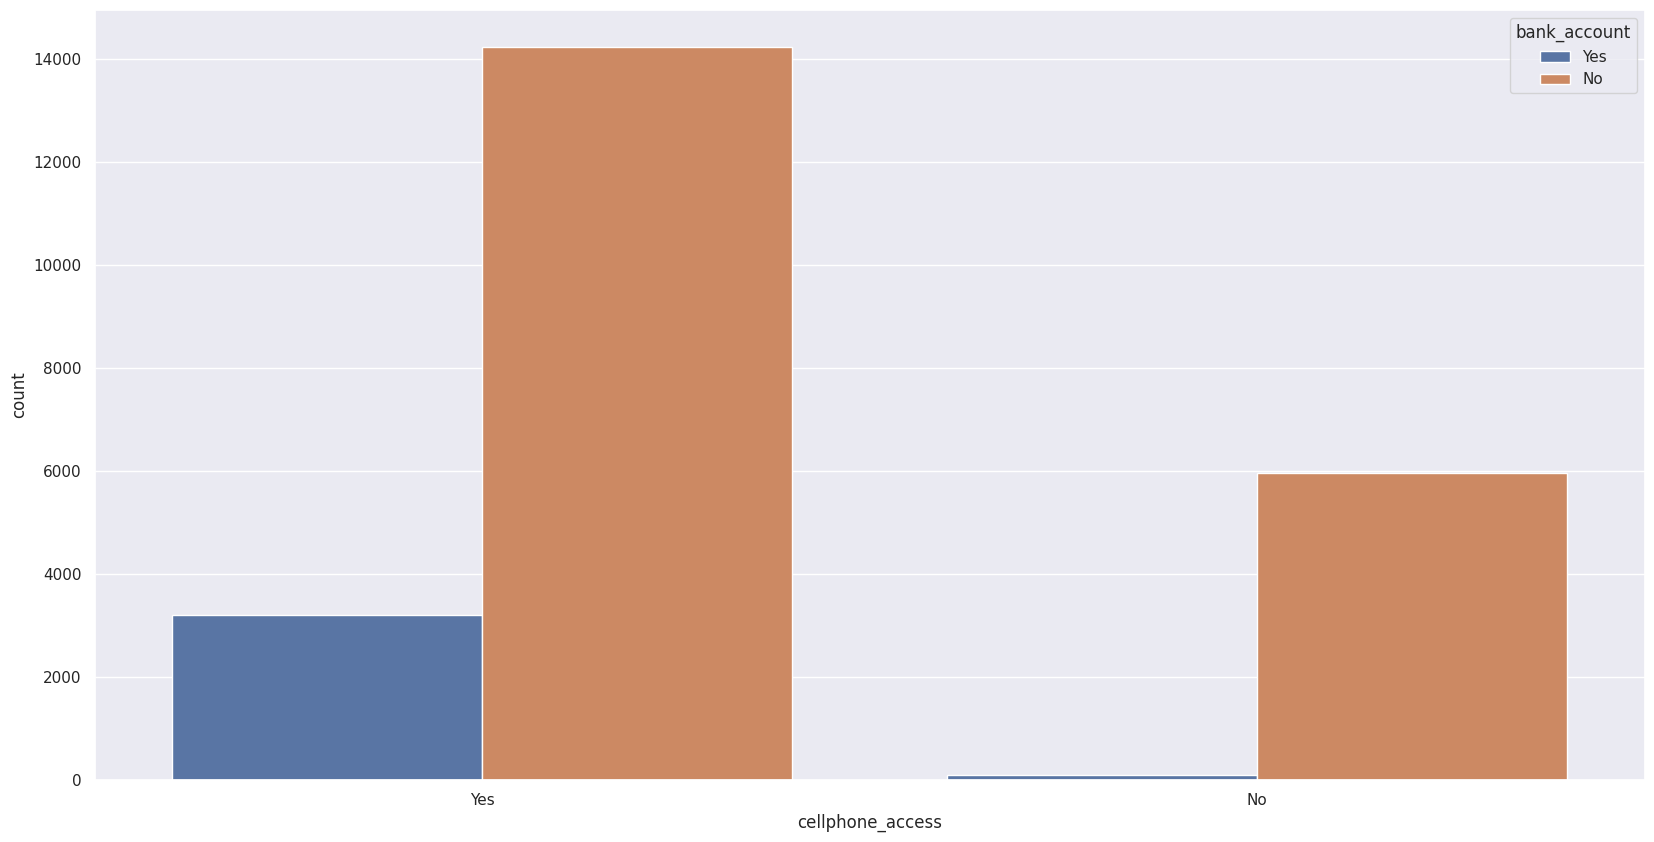

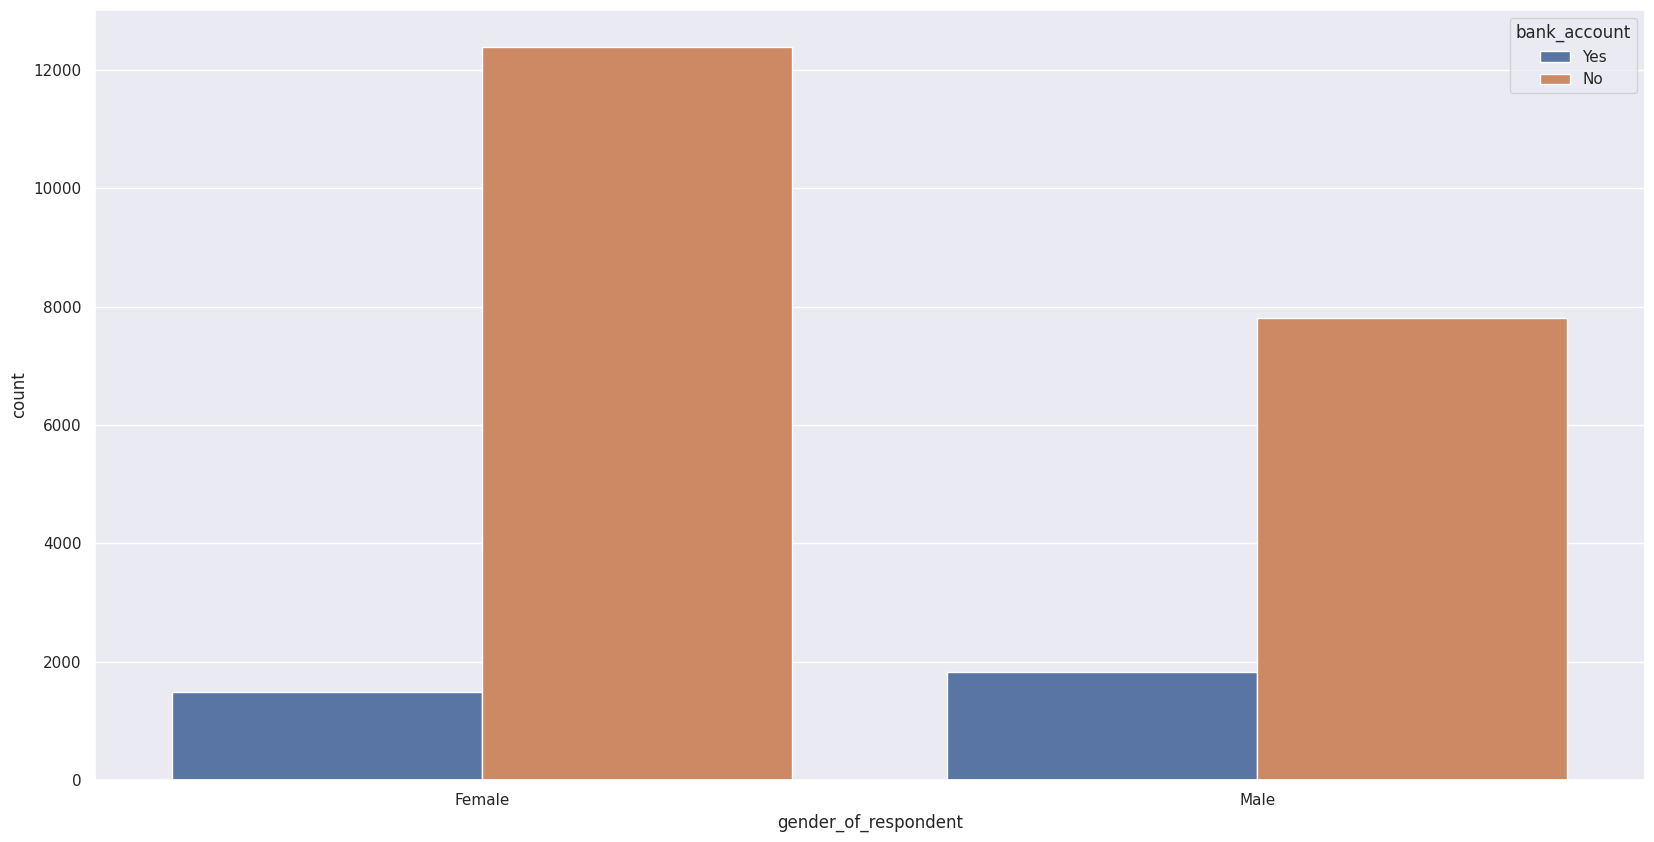

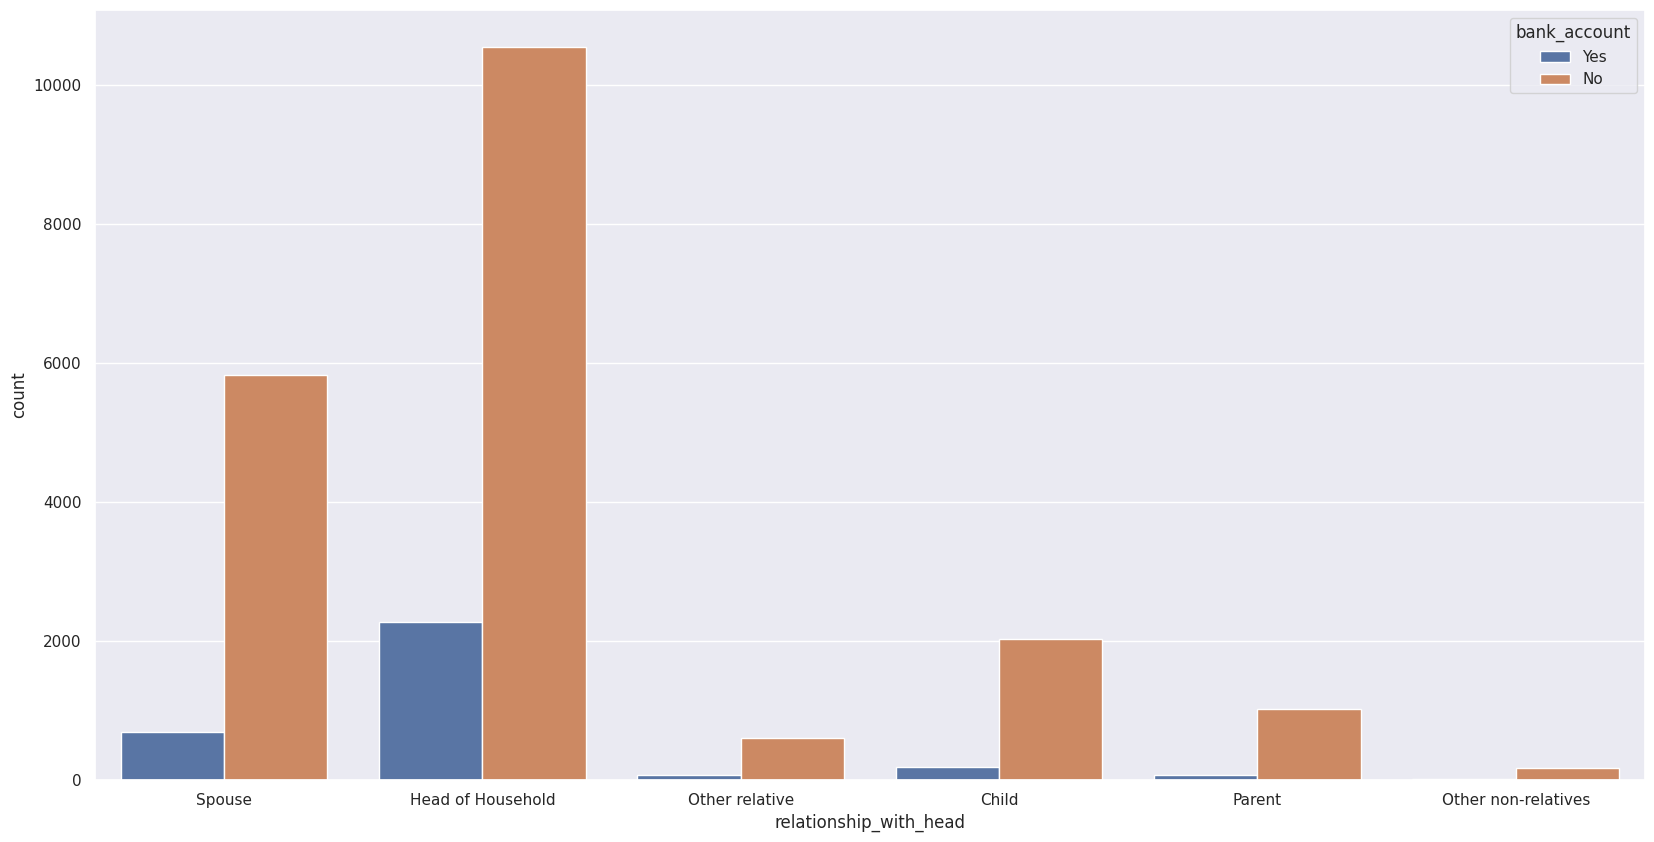

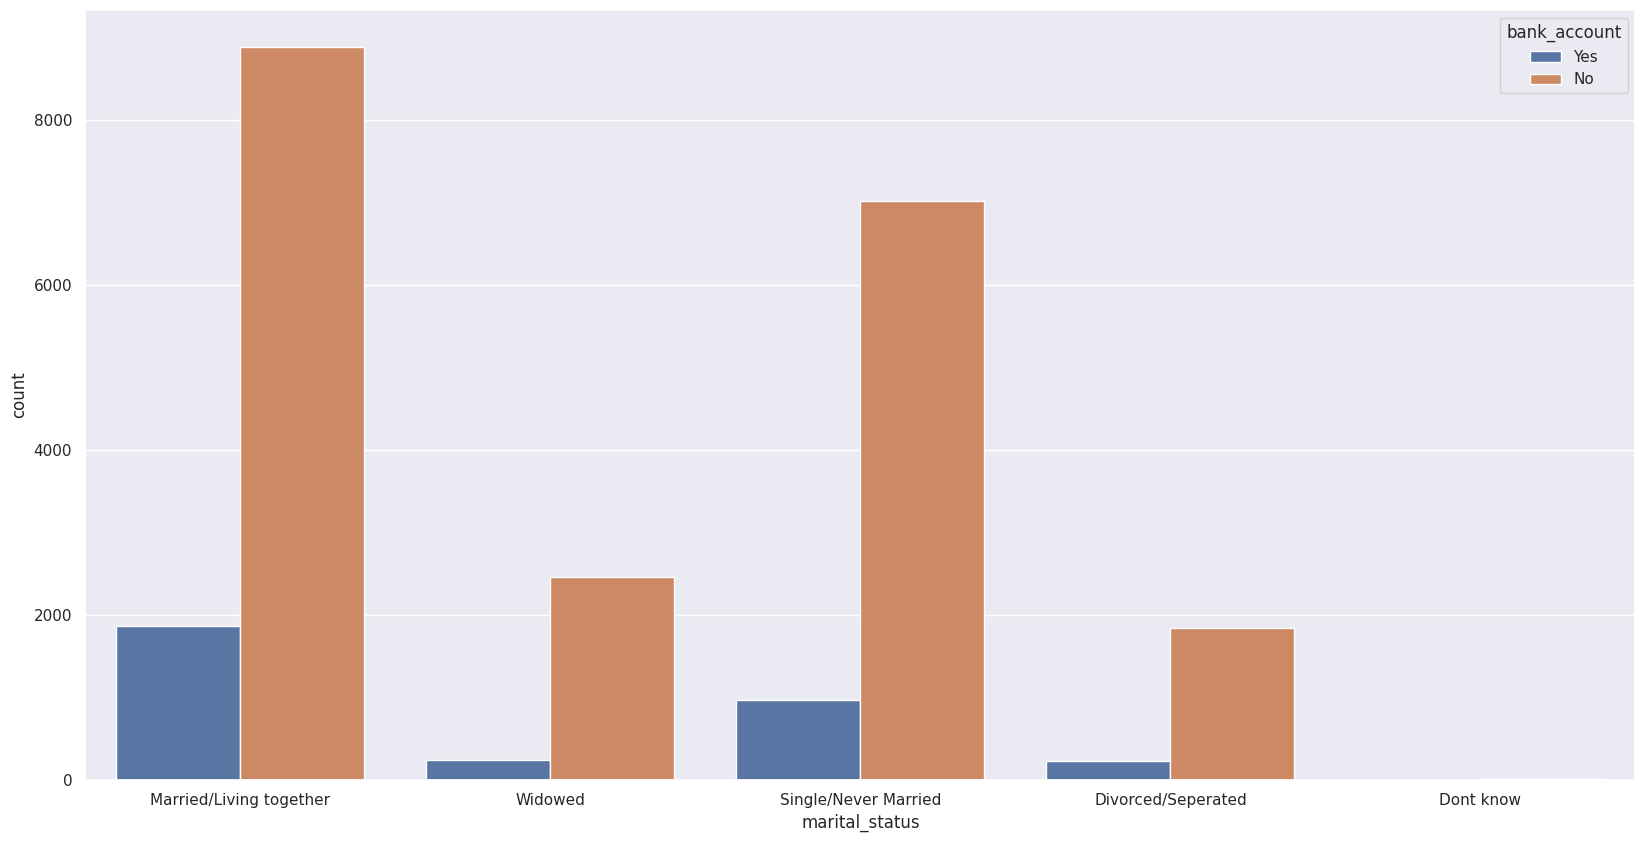

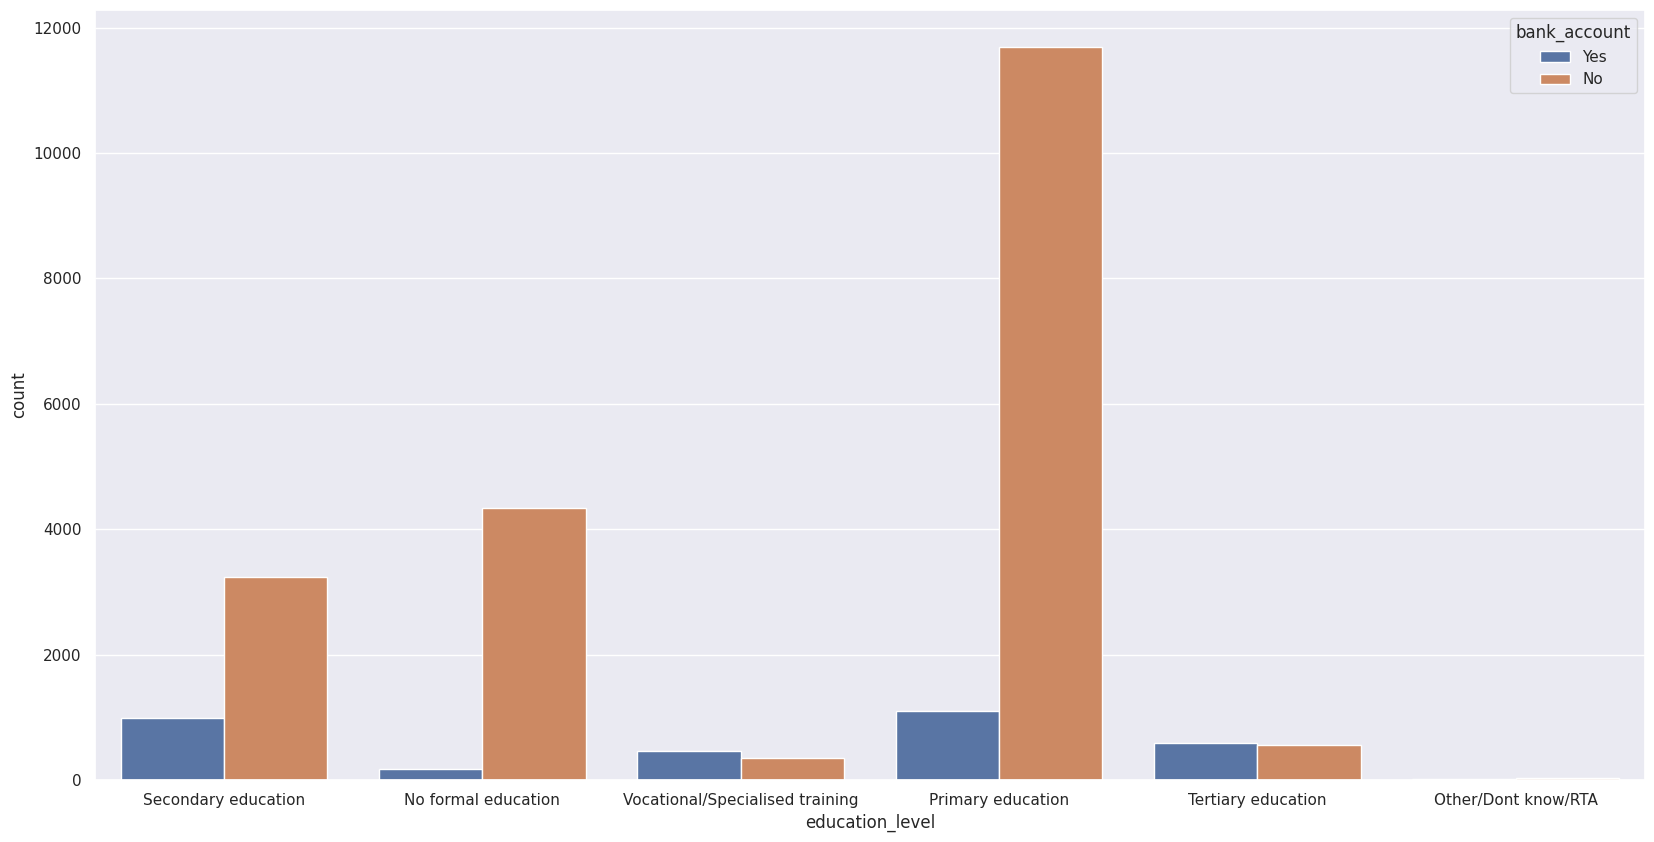

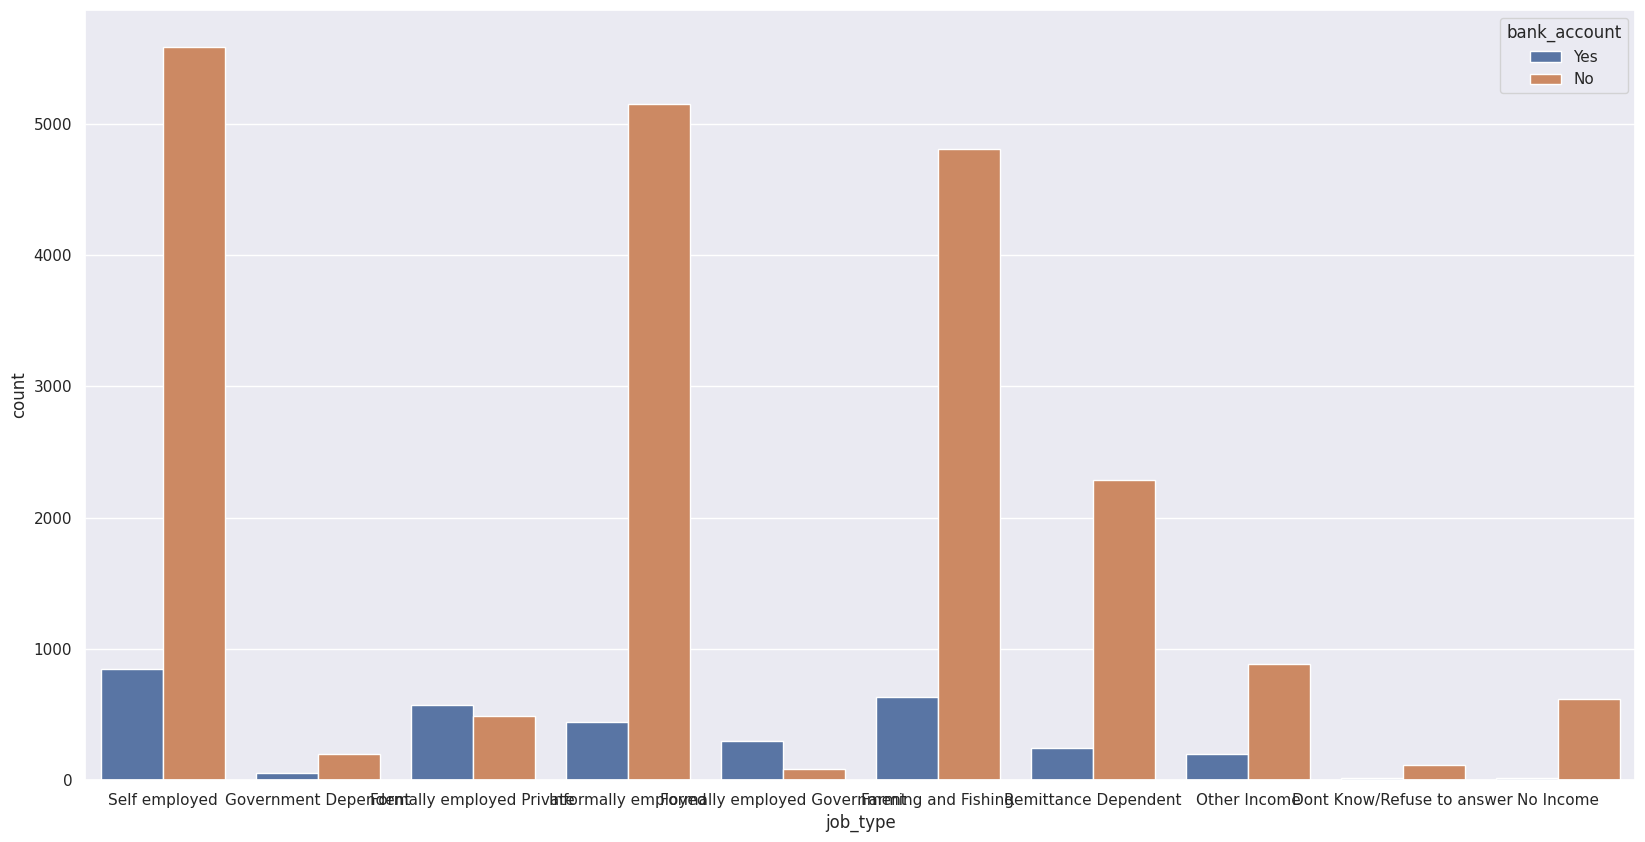

In [753]:
cat_columns = ['country', 'bank_account', 'location_type', 'cellphone_access',
         'gender_of_respondent',
       'relationship_with_head', 'marital_status', 'education_level',
       'job_type']

sns.set(rc={"figure.figsize":(20,10)},style='darkgrid')
for i in cat_columns  :
   
    sns.countplot(data=data, x=i, hue="bank_account")
    plt.show() 

In [754]:
# df_total = df_enc.groupby('year').sum()

# # Tracer le graphique
# fig, ax = plt.subplots()
# ax.plot(df_total.index, df_total['bank_account'])
# ax.set_xlabel('Année')
# ax.set_ylabel('Nombre total de 1')
# ax.set_title('Évolution dans le temps du nombre total de compte')
# ax.set_facecolor('white')
# plt.show()

In [755]:
df_total

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda
year,,,,,,,,,,,,,,,,,,,,,
2016,1003,1252,7249,39146,343224,3531,1214,4575,86,88,...,91,2878,0,323,662,605,0,8735,0,0
2017,607,4811,3956,15510,254735,2814,199,3697,47,237,...,84,1300,380,35,677,3774,0,0,6620,0
2018,1702,3118,6249,34676,314895,3302,816,4559,57,343,...,72,1419,247,722,1188,2058,6068,0,0,2101


In [756]:
import plotly.express as px
fig = px.histogram(data, x="marital_status", color="bank_account", barmode='group')
fig.update_layout(bargap=0.2)
fig.show()

Text(0.5, 1.0, 'Status marital des clients possédant un compte')

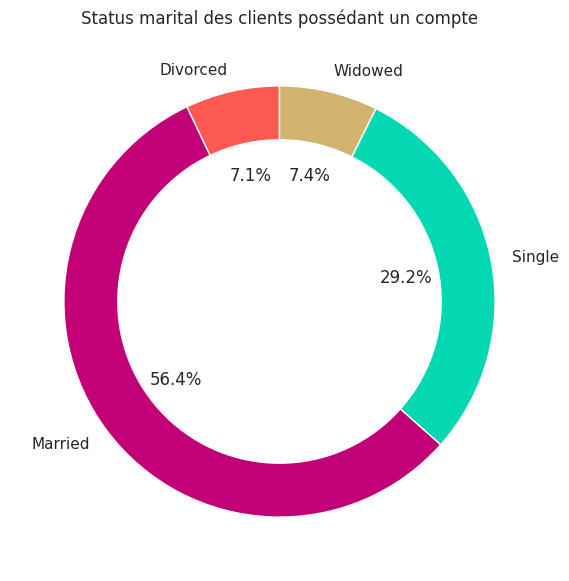

In [757]:
ms_pivot = pd.pivot_table(data = data[df_enc["bank_account"] == 1], columns = "marital_status", values = "bank_account",
                                aggfunc = 'count')

ms_np = ms_pivot.to_numpy()
ms_np_reshape = ms_np.reshape(5,)
ms_np_c = np.delete(ms_np_reshape, 1)

ms_label = ["Divorced", "Married", "Single", "Widowed"]
ms_color = sns.color_palette("tab10")
ms_colors = ["#FC5A50", "#C20078", "#04D8B2", "#D1B26F"]
explode = (0, 0, 0, 0)

# Pie chart

fig1, ax1 = plt.subplots(figsize = (10, 7))
ax1.pie(ms_np_c,
        explode=explode,
        labels=ms_label,
        colors=ms_colors,
        autopct='%1.1f%%',
        startangle=90)

# Changing the pie chart to dont chart

centre_circle = plt.Circle((0,0),0.75,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.set_title('Status marital des clients possédant un compte')

# Normalisation

In [758]:
df_enc

,year,uniqueid,bank_account,location_type,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,...,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,cellphone_enc
0,2018,uniqueid_1,1,0,3,24,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0.183797
1,2018,uniqueid_2,0,0,5,70,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.017133
2,2018,uniqueid_3,1,1,5,26,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0.183797
3,2018,uniqueid_4,0,0,5,34,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.183797
4,2018,uniqueid_5,0,1,8,26,1,1,0,0,...,1,0,0,0,0,1,0,0,0,0.017133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,2018,uniqueid_2113,0,0,4,48,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0.183797
23520,2018,uniqueid_2114,0,0,2,27,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0.183797
23521,2018,uniqueid_2115,0,0,5,27,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0.183797
23522,2018,uniqueid_2116,0,1,7,30,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0.183797


In [759]:
def normalize_dataframe(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [760]:
df_norm = normalize_dataframe(df_enc.drop(["uniqueid"], axis = 1))

In [761]:
df_norm

,year,bank_account,location_type,household_size,age_of_respondent,gender_of_respondent,relationship_with_head_Child,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country_Kenya,country_Rwanda,country_Tanzania,country_Uganda,cellphone_enc
0,1.0,1.0,0.0,0.10,0.095238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.20,0.214286,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,0.0,0.0,0.15,0.380952,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23520,1.0,0.0,0.0,0.05,0.130952,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23521,1.0,0.0,0.0,0.20,0.130952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
23522,1.0,0.0,1.0,0.30,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


# Export de mes données

In [762]:
df_enc = df_enc.drop(["uniqueid"], axis = 1).to_csv("data/df_enc.csv", index = False)

In [763]:
df_norm = df_norm.to_csv("data/df_norm.csv", index = False)